# 2nd Study Case: Sentiment Analysis

Sentiment Analysis with IndoNLU dataset and Indobert-base-p1 pre-trained model.

SVM Version

Naufal Mu'afi<br>
nmuafi1@gmail.com

---


First, clone the repository from IndoNLU that contains the dataset with git clone https://github.com/indobenchmark/indonlu.

Then, we can import all the necessary library

In [2]:
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

## Data Preparation
---

In [4]:
data_train = pd.read_csv('./indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_test = pd.read_csv('./indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])
 
data_train.head(5)

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


## Data Analysis
---

In [5]:
print(data_train.shape)
print(data_test.shape)

(11000, 2)
(1260, 2)


In [6]:
# calculate total data for each variable in Target column
data_train['Target'].value_counts()

Target
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

<AxesSubplot:xlabel='Target'>

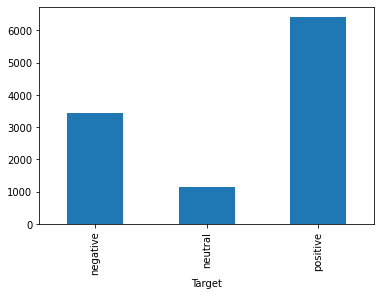

In [7]:
data_train.groupby('Target').size().plot(kind='bar')

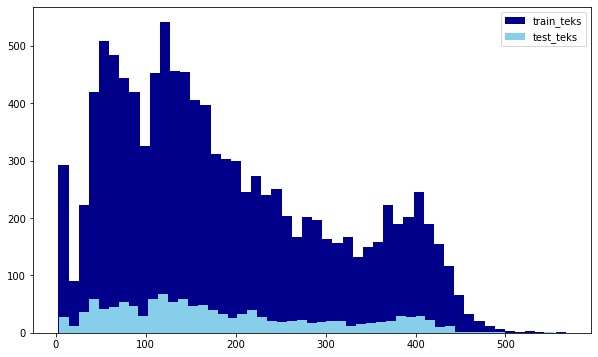

In [8]:
# visualization of text length in data train and test

length_train = data_train['Teks'].str.len()
length_test = data_test['Teks'].str.len()

plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label='train_teks', color='darkblue')
plt.hist(length_test, bins=50, label='test_teks', color='skyblue')
plt.legend()

we can see the sentiment of all the data with word cloud

In [12]:
def wordCloud(words):
  wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
  
  plt.figure(figsize=(10,7))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')

In [17]:
all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

ValueError: Only supported for TrueType fonts

In [14]:
negative_words = ' '.join(text for text in data_train['Teks'][data_train['Target'] == 'negative']) 
wordCloud(negative_words)

ValueError: Only supported for TrueType fonts